<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Task-research" data-toc-modified-id="Task-research-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task research</a></span><ul class="toc-item"><li><span><a href="#Balancing-classes" data-toc-modified-id="Balancing-classes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Balancing classes</a></span></li><li><span><a href="#Models-without-balancing" data-toc-modified-id="Models-without-balancing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Models without balancing</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Overcoming-Class-Imbalance" data-toc-modified-id="Overcoming-Class-Imbalance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overcoming Class Imbalance</a></span><ul class="toc-item"><li><span><a href="#Class-weighting" data-toc-modified-id="Class-weighting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Class weighting</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Testing-the-model" data-toc-modified-id="Testing-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing the model</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Feature-importances-bar" data-toc-modified-id="Feature-importances-bar-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature importances bar</a></span></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

Beta-Bank is losing clients every month. Not many, but it's noticeable. The marketing department has discovered that retaining current customers is cheaper than attracting new ones.

It is necessary to predict whether the client will leave the bank shortly or not. The historical data on customer behavior and termination of contracts with the bank is provided.

The task is to build a model with an ultimately high value of F1 metric. 
The project is completed successfully if the metric is higher than 0.59. 

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Data description

Features
- RowNumber — row index
- CustomerId — unique customer's identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — how many years a person has been a client of the bank
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — if the customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary

Target
- Exited — if the customer has left

## Data preparation

In [187]:
import pandas as pd
pd.options.mode.chained_assignment = None  
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
import random
from matplotlib import pyplot
import numpy as np
import sweetviz as sv

In [188]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


All data types look correct.
There are missing values in the **Tenure** column.

Missing values report:

In [189]:
data[data.isna().any(axis=1)].sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
795,796,15686870,Ball,761,Germany,Male,36,NaN,108239.11,2,0,0,99444.02,0
8280,8281,15745716,McGregor,706,Spain,Male,53,NaN,0.00,2,0,1,117939.17,0
4141,4142,15790596,Moran,850,Spain,Male,39,NaN,141829.67,1,1,1,92748.16,0
4350,4351,15754072,Dennis,840,Spain,Female,36,NaN,0.00,2,1,0,141364.27,0
1628,1629,15810347,Todd,662,Spain,Female,30,NaN,0.00,2,0,1,157884.83,0
414,415,15810432,Moseley,795,Spain,Male,35,NaN,0.00,2,1,0,167155.36,0
2659,2660,15679410,Caldwell,729,France,Female,62,NaN,140549.40,1,1,0,30990.16,1
2779,2780,15781702,Brookes,733,Germany,Male,38,NaN,111347.37,2,0,1,194872.97,0
2786,2787,15585100,Rioux,511,Germany,Female,40,NaN,124401.60,1,1,0,198814.24,1
424,425,15566111,Estes,596,France,Male,39,NaN,0.00,1,1,0,48963.59,0


Filling the missing values with random number within the column:

In [192]:
random.seed(10)
data['Tenure'].fillna(random.choice(data['Tenure'][data['Tenure'].notna()]), inplace=True)

Dropping the columns which are useless for model learning:

In [194]:
data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

Replacing the symbols for the gender with the numbers:

In [195]:
data['Gender'].replace({'Female':1,'Male':0},inplace=True)


One-hot encoding data for the **Geography** column:

In [196]:
data_ohe = pd.get_dummies(data, columns=['Geography'])

Dividing the sample into training, validation, and test

In [197]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

features_train, features_rest, target_train, target_rest = train_test_split(
    features, target, train_size=0.6, random_state=12345) 
features_valid, features_test, target_valid, target_test = train_test_split(
    features_rest, target_rest, test_size=0.5, random_state=12345) 

Evaluating samples:

In [229]:
print('Training:',features_train.shape,
      'Test:', features_test.shape,
      'Validation:', features_valid.shape)

Training: (6000, 12) Test: (2000, 12) Validation: (2000, 12)


Scaling the numeric values for the learning process:

In [199]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Summary

There are 10000 records in the sample. 

The missed values were filled with random numbers within the column.

Several columns were removed from the sample as they will not be used for the learning process.
The **gender** column categorical data was converted to the numerical format.

The **country name** column was converted with the One-hot encoding technique.

Numeric values were scaled to make it easier to train the model.


## Task research

### Balancing classes

Estimating the classes ratio of the target feature within the full sample:

In [200]:
data.value_counts('Exited')

Exited
0    7963
1    2037
dtype: int64

The classes are unbalanced and the ratio is 80:20.

Building the models without balancing classes:

### Models without balancing

Logistic Regression:

In [201]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.33389544688026984


Decision Tree:

In [202]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.474251497005988


Searching for the optimal parameters for the Random Forest:

In [203]:
best_model_tree = 0
best_result = 0
best_depth = 0  
best_estimator = 0
for estimator in range(20, 100, 20):
    for depth in range(1, 16, 1):
        model = RandomForestClassifier(
            n_estimators=estimator, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        result = model.score(features_valid,target_valid)
        if result > best_result:
            best_model_tree = model
            best_result = result
            best_depth = depth    
            best_estimator = estimator

print(best_depth)
print(best_estimator)

8
80


Training the Random Forest model with optimal parameters:

In [204]:
model = RandomForestClassifier(
    n_estimators=80, max_depth=8, random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5709779179810726


Calculating the AUC-ROC metric:

In [205]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8504028575057919


### Summary

Class balance was assessed in the sample. It's ratio is 80:20.

F-value was calculated for three models - logistic regression, decision tree, and random forest. 

The optimal parameters were searched for the random forest model.
The F-value metric for this model is equal 0.570, which is very close to the target value.
AUC-ROC = 0.850

## Overcoming Class Imbalance

### Class weighting

Using class_weight='balanced' parameter for the unbalanced class:

Logistic regression:

In [206]:
model = LogisticRegression(
    random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.48676345004269855


Decision Tree:

In [207]:
model = DecisionTreeClassifier(
    random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49101796407185627


Random Forest:

In [208]:
best_model_tree = 0
best_result = 0
best_depth = 0  
best_estimator = 0
for estimator in range(20, 100, 20):
    for depth in range(1, 16, 1):
        model = RandomForestClassifier(
            n_estimators=estimator, max_depth=depth, random_state=12345, class_weight='balanced')
        model.fit(features_train, target_train)
        result = model.score(features_valid,target_valid)
        if result > best_result:
            best_model_tree = model
            best_result = result
            best_depth = depth    
            best_estimator = estimator

print(best_depth)
print(best_estimator)

15
80


Evaluating the quality of the model with the obtained parameters:

In [209]:
model = RandomForestClassifier(
    n_estimators=80, max_depth=15, random_state=12345, class_weight='balanced')

model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5865102639296187


Calculating AUC-ROC metric:

In [210]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8380713953024155


### Upsampling

Using upsampling technique for the sample to simplify model training.

Creating a function:

In [211]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [212]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Training the logistic regression model on upsampled data:

In [213]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.488013698630137


Training the decision tree model:

In [214]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.48441247002398086


Searching for optimal parameters for the random tree model:

In [215]:
best_model_tree = 0
best_result = 0
best_depth = 0  
best_estimator = 0
for estimator in range(20, 100, 20):
    for depth in range(1, 16, 1):
        model = RandomForestClassifier(
            n_estimators=estimator, max_depth=depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        result = model.score(features_valid,target_valid)
        if result > best_result:
            best_model_tree = model
            best_result = result
            best_depth = depth    
            best_estimator = estimator

print(best_depth)
print(best_estimator)

15
40


Training the model with optimal parameters:

In [216]:
model = RandomForestClassifier(
    n_estimators=40, max_depth=15, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6144121365360304


Calculating AUC-ROC metric:

In [217]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8337040812005879


### Downsampling

Using the downsampling technique and evaluating the result:

In [218]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Training the logistic regression model on downsampled data:

In [219]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.48096885813148793


Training the decision tree model on downsampled data:

In [220]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49280270956816263


Searching for optimal parameters for the random forest model on downsampled data:

In [221]:
best_model_tree = 0
best_result = 0
best_depth = 0  
best_estimator = 0
for estimator in range(20, 100, 20):
    for depth in range(1, 16, 1):
        model = RandomForestClassifier(
            n_estimators=estimator, max_depth=depth, random_state=12345)
        model.fit(features_downsampled, target_downsampled)
        result = model.score(features_valid,target_valid)
        if result > best_result:
            best_model_tree = model
            best_result = result
            best_depth = depth    
            best_estimator = estimator

print(best_depth)
print(best_estimator)

7
60


Training the model with optimal parameters and evaluating the result:

In [222]:
model = RandomForestClassifier(n_estimators=60, max_depth=7, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5888030888030888


Calculating the AUC-ROC metric:

In [223]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8453338696701529


### Summary

Three methods were applied to combat the imbalance: the class weighting parameter, upsampling, and downsampling techniques. 

Three models were trained: logistic regression, decision tree, and random forest with optimal parameters.

The random forest model with optimal parameters showed the required result in all three cases.

The model showed the best result on upsampled data: F-value is equal to 0.614. This result corresponds with the desired quality criteria of the model.

The remaining models did not show the corresponding result.

The AUC-ROC metric for the random forest model was calculated. 
It is approximately equal to 0.84. 
The random forest model has the highest AUC-ROC value on downsampled data.

## Testing the model

Validating the model quality on a test sample:

In [224]:
model = RandomForestClassifier(
    n_estimators=40, max_depth=14, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)

print("F1:", f1_score(target_test, predicted_test))

F1: 0.6000000000000001


The model meets the stated quality criteria on a test sample.

Visualizing the quality of the model by building a ROC curve:

In [225]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

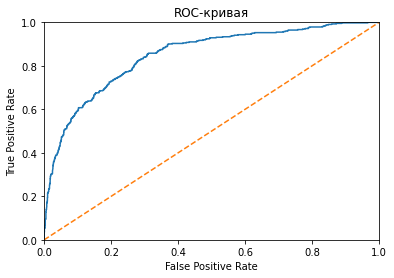

In [226]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

The curve confirms the quality of the model.

Calculating the AUC-ROC metric:

In [227]:
auc_roc=roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8486555404147385


### Summary

The chosen model has been tested. 
The F-value is equal to 0.599 on a test sample, which corresponds to the required quality criteria.

A ROC curve was also built and the AUC-ROC metric was calculated for the model. AUC-ROC is equal to 0.834.

## Feature importances bar

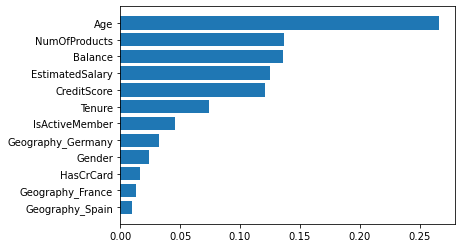

In [228]:
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(features_train.columns)[indices])

As we can see from the bar, the most important factor is the client's age.

It is twice as important as the balance, the number of products used, the credit score, and the approximate salary.

## General conclusion

- The data was prepared: the gaps were filled in, extra columns were removed, the text values were encoded, and the numeric values were scaled. 


- Three models were built for the original sample: logistic regression, decision tree, and random forest. None of them gave the required F-value


- Three methods were used to combat the imbalance: the class weighting parameter and the downsampling and upsampling techniques. The optimal model parameters were searched for the Random tree model. 


- Combined with an upsampling technique, this model had the highest F-value = 0.62. On a test sample, the selected model has an F-value=0.599. It corresponds to the required quality criteria.


- The AUC-ROC metric is equal to 0.835, which is very close to 1. It confirms the quality of the chosen model.


- Of all factors, age is the most important for model training, followed by balance, number of products used, credit score, and salary.
